#              "["PDS PROJECT ....GUIDE : SUDEEP MALLICK"]"

### "[ A PROJECT ON "GOOD READ BOOKS" FROM THE KAGGLE DATASET]"

##### _____________________________________________________BY :-   MAHENDRA NANDI 

##### ____________________________________________________ .[A Student of MSc. BDA from RKMVERI]

###### IMPORTING LIBRARIES AND DATSET AND MODIFYING IT

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame , Series

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

#Columns Description:

#    bookID Contains the unique ID for each book/series
#    title contains the titles of the books
#    authors contains the author of the particular book
#    average_rating the average rating of the books, as decided by the users
#    ISBN ISBN(10) number, tells the information about a book - such as edition and publisher
#    ISBN 13 The new format for ISBN, implemented in 2007. 13 digits
#    language_code Tells the language for the books
#    Num_pages Contains the number of pages for the book
#    Ratings_count Contains the number of ratings given for the book
#    text_reviews_count has the count of reviews left by users

In [4]:
book=pd.read_csv("booksP.csv")

In [5]:


books = book.copy()
books.rename(columns={'average_rating': 'average rating',
                      'language_code': 'language code',
                      '  num_pages': 'no of pages',
                      'ratings_count': 'ratings count',
                      'text_reviews_count': 'text reviews count',
                      'publication_date': 'publication date'}, inplace=True)

l6=[i[len(i)-1] for 
    i in [i.split("-") for
                          i in [i[len(i)-1] for 
                                i in [i.split("/") for
                                                      i in [i for
                                                            i in books["publication date"]]]]]]


books["publication date"]=l6
books.num_pages=books["no of pages"]
books["publication date"]= books["publication date"].astype("int64")
books["rating"]=pd.cut(books['average rating'],(-0.1,3,4,4.5,5.1),
                       labels=['LOW','MEDIUM',"HIGH","VERY HIGH"])
books["published year"]=pd.cut(books['publication date'],
                            [1920,1980, 1990,1995, 2000,2005, 2010, 2020],
                            labels=['1920-1980','1980-1990','1990-1995','1995-2000',
                                    '2000-2005','2005-2010','2010-2020'])
#books.head()

<ipython-input-5-657b2d3aa689>:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  books.num_pages=books["no of pages"]


In [6]:
lang_eng=books[books["language code"]=="eng"]


lang_eng_us= books[books["language code"]=="en-US"]


lang_2=pd.concat([lang_eng,lang_eng_us])


df3= books[books["language code"]=="spa"]


df4= books[books["language code"]=="en-GB"]


df5= books[books["language code"]=="fre"]


lang_5=pd.concat([lang_eng,lang_eng_us,df3,df4,df5])


In [7]:
#books.info()

In [8]:
#books.columns

In [9]:
for i in books.columns:
    value = np.unique(books[i])
    print('{}: {} distinct values\n'.format(i,len(value)))

bookID: 11127 distinct values

title: 10352 distinct values

authors: 6643 distinct values

average rating: 209 distinct values

isbn: 11127 distinct values

isbn13: 23 distinct values

language code: 27 distinct values

no of pages: 997 distinct values

ratings count: 5294 distinct values

text reviews count: 1822 distinct values

publication date: 87 distinct values

publisher: 2292 distinct values

rating: 4 distinct values



TypeError: '<' not supported between instances of 'float' and 'str'

# (1. . .) UNIVARIATE PLOTS

In [26]:
#style must be one of white, dark, whitegrid, darkgrid, ticks

## (1.A. .) univariate continuous 

###  (1.A.a)Distribution of Average rating of books

C:\Users\Ramkrishna Mission\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


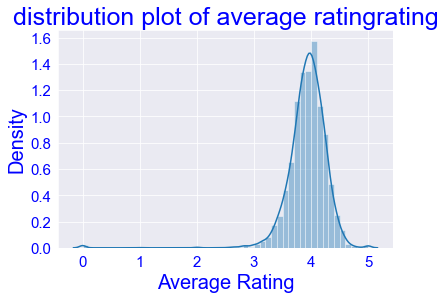

In [13]:
sns.set_style('darkgrid')
sns.distplot(books["average rating"])

plt.xticks(rotation=0,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('Average Rating',size=20,color="blue")
plt.ylabel('Density',size=20,color="blue")
plt.title('distribution plot of average ratingrating',size=25,color="blue")
plt.show()

In [115]:
##

#plt.figure(figsize=(30,5))
#sns.boxplot(x=books['average rating'],palette = 'gist_ncar_r')

#plt.xticks(rotation=90,size=15,color="red")
#plt.yticks(rotation=0,size=15,color="red")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Average rating',size=20,color="blue")
#plt.title('Column diagram of language and rating',size=25,color="blue")
#plt.show()

In [21]:
#sns.set_theme(style="darkgrid")
#fig,axe=plt.subplots()
##n,bins,-=axe.hist(books.average_rating,bins=20)
#axe.hist(books["average rating"],bins=50)

#plt.xticks(rotation=90,size=15,color="blue")
#plt.yticks(rotation=0,size=15,color="blue")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Count',size=20,color="blue")
#plt.title('scatter plot of language and rating',size=25,color="blue")
#plt.show()

###  (1.A.b)Distribution of year of publishing of books

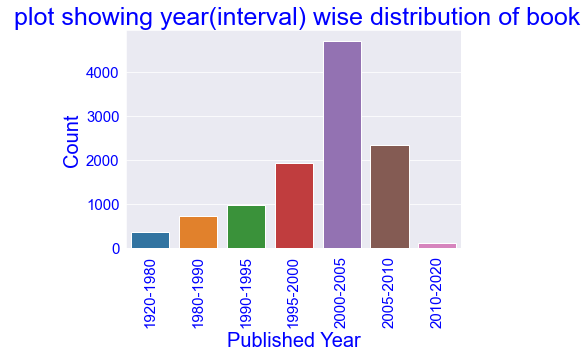

In [16]:
sns.countplot(data=books,x="published year",orient="h")

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('Published Year',size=20,color="blue")
plt.ylabel('Count',size=20,color="blue")
plt.title(' plot showing year(interval) wise distribution of book',size=25,color="blue")
#plt.gca().legend(books["language code"].value_counts().index,loc="center left",bbox_to_anchor=(1,0.5))
plt.show()

In [22]:
#sns.set_theme(style="darkgrid",palette="Wistia")
#fig,axe=plt.subplots()
##n,bins,-=axe.hist(books.average_rating,bins=20)
#axe.hist(books["publication date"],bins=50)

#plt.xticks(rotation=90,size=15,color="blue")
#plt.yticks(rotation=0,size=15,color="blue")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Count',size=20,color="blue")
#plt.title('scatter plot of language and rating',size=25,color="blue")
#plt.show()

In [31]:
#sns.set_theme(style="dark")
#books["publication date"].value_counts().head(30).plot.bar()

#plt.xticks(rotation=90,size=15,color="blue")
#plt.yticks(rotation=0,size=15,color="blue")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Count',size=20,color="blue")
#plt.title('scatter plot of language and rating',size=25,color="blue")
#plt.show()

###  (1.A.c)Distribution of total counts of rating

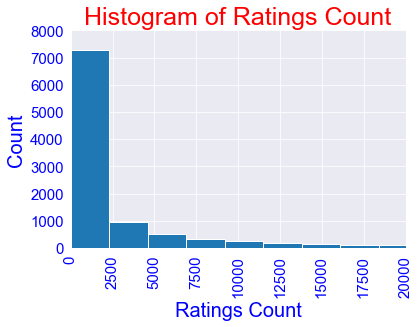

In [19]:
fig,axe=plt.subplots()
axe.hist(books["ratings count"],bins=2000)
#axe.hist(books.text_reviews_count)
axe.axis([0, 0.2* 10**5, 0, 8000])

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('Ratings Count',size=20,color="blue")
plt.ylabel('Count',size=20,color="blue")
plt.title('Histogram of Ratings Count',size=25,color="red")
plt.show()

## (1.B. .) univariate discrete 

### (1.B.a) Occurence of top 20 unique BOOKS 

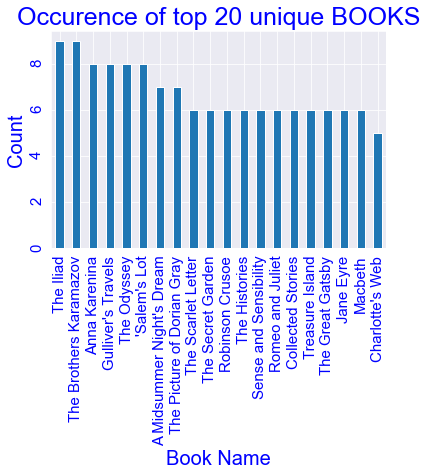

In [21]:

books["title"].value_counts().head(20).plot.bar()

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=90,size=15,color="blue")
plt.xlabel('Book Name',size=20,color="blue")
plt.ylabel('Count',size=20,color="blue")
plt.title('Occurence of top 20 unique BOOKS',size=25,color="blue")
plt.show()

### (1.B.b) Occurence of top 10 authors (individual)

C:\Users\Ramkrishna Mission\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


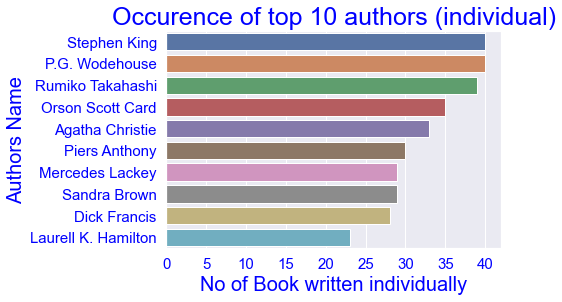

In [23]:
books_authors=books["authors"].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(books_authors.values,books_authors.index,alpha=1.0,orient="h")

plt.xticks(rotation=0,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('No of Book written individually',size=20,color="blue")
plt.ylabel('Authors Name',size=20,color="blue")
plt.title('Occurence of top 10 authors (individual)',size=25,color="blue")
plt.show()

#plt.title("Frequency Distribution of most used 10 Languages of the book")
#plt.ylabel("Number of Occurrence")
#plt.xlabel("Language used in the book", fontsize=12)
#labels = sub1.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
#                            rotation=30, fontsize='small')
#plt.show()

In [98]:
##
#most_books = books.groupby('authors')['title'].count().reset_index().sort_values('title',
 #                                               ascending=False).head(10).set_index('authors')
#plt.figure(figsize=(15,10))
#ax = sns.barplot(most_books['title'], most_books.index, palette='inferno')


#totals = []
#for i in ax.patches:
#    totals.append(i.get_width())
#total = sum(totals)
#for i in ax.patches:
#    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')


#plt.xticks(rotation=90,size=15,color="red")
#plt.yticks(rotation=0,size=15,color="red")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Average rating',size=20,color="blue")
#plt.title('Column diagram of language and rating',size=25,color="blue")
#plt.show()

In [29]:
#books["authors"].value_counts().head(20).plot.bar()

#plt.xticks(rotation=90,size=15,color="blue")
#plt.yticks(rotation=90,size=15,color="blue")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Count',size=20,color="blue")
#plt.title('scatter plot of language and rating',size=25,color="blue")
#plt.show()

### (1.B.c) pie chartt of Occurence of 6 most used language 

<ipython-input-25-dfb4296d9c79>:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(books_lang,explode=([0.5]*6),shadow=True,startangle=45,labels=labels,textprops={"fontsize": 20},


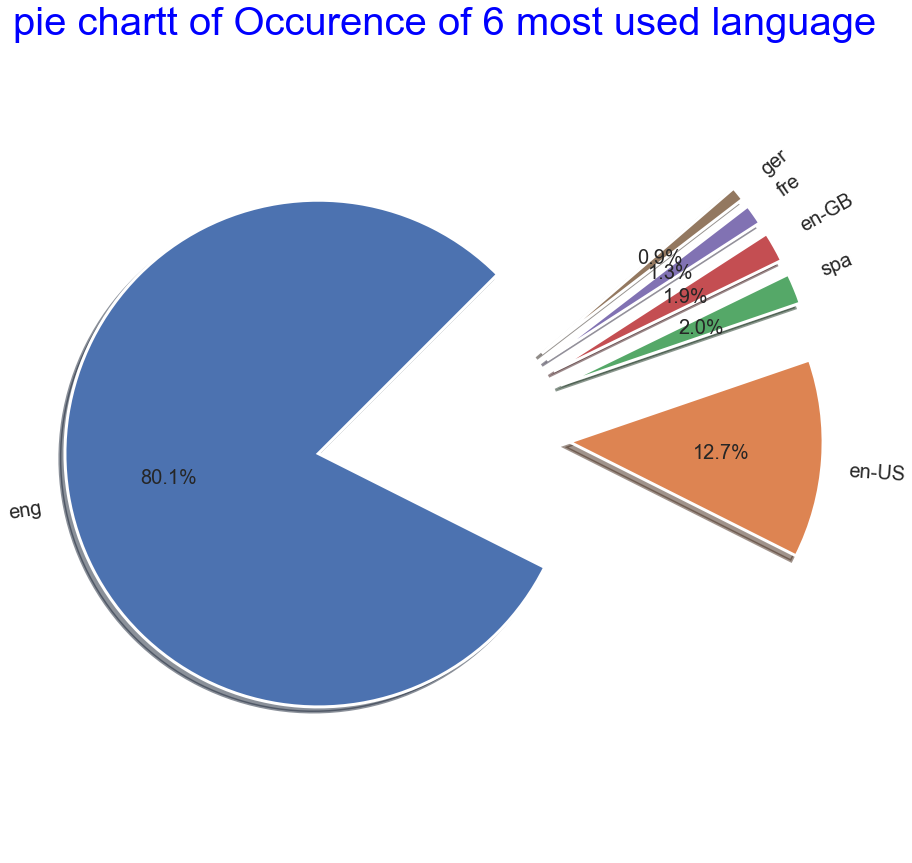

In [25]:
#fig,ax=plt.subplots(figsize=(15,15))
books_lang=books["language code"].value_counts().head(6)/len(books)
labels='eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger'#, 'jpn', 'mul', 'zho','grc'
fig,ax=plt.subplots(figsize=(15,15))
ax.pie(books_lang,explode=([0.5]*6),shadow=True,startangle=45,labels=labels,textprops={"fontsize": 20},
       wedgeprops={'linewidth': 3},rotatelabels=True,autopct='%1.1f%%')
ax.axis('equal')

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Count',size=20,color="blue")
plt.title('pie chartt of Occurence of 6 most used language',size=40,color="blue")
plt.show()

In [ ]:
# explode=None,
 #   labels=None,
  #  colors=None,
   # autopct=None,
    #pctdistance=0.6,
#    shadow=False,
 #   labeldistance=1.1,
  #  startangle=0,
   # radius=1,
    #counterclock=True,
#    wedgeprops=None,
 #   textprops=None,
  #  center=(0, 0),
   # frame=False,
    #rotatelabels=False,
#    *,
 #   normalize=None,
  #  data=None,
   #
    #

In [161]:
##
#plt.figure(1, figsize=(25,10))
#plt.title("Languages")
#sns.countplot(x = "language code", 
#              order=books['language code'].value_counts().index[0:10] ,data=books,palette='inferno')



In [46]:
#books_lang=books["language code"].value_counts().head(10)
#sns.set(style="darkgrid")
#sns.barplot(books_lang.index,books_lang.values,alpha=1.0)



In [20]:
#sns.set_theme()
#books["language code"].value_counts().head(10).plot.bar()



### (1.B.a) Occurence of popurlar 10 publishers

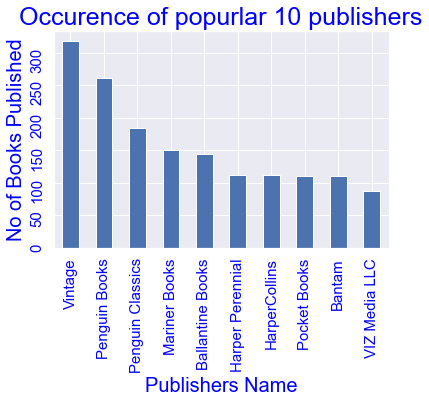

In [26]:
fig,ax=plt.subplots()
fig=books["publisher"].value_counts().head(10).plot.bar()

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=90,size=15,color="blue")
plt.xlabel('Publishers Name',size=20,color="blue")
plt.ylabel('No of Books Published',size=20,color="blue")
plt.title('Occurence of popurlar 10 publishers',size=25,color="blue")
plt.show()

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired',
'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 
'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 
#'viridis_r', 'vlag', 'vlag_r', 
#'winter', 'winter_r'


#

#  (2. . )BIVARIATE PLOTS

## (2.A. )bivariate [continuous vs continuous]     shown in multivariate analysis part                                                                                        i.e, (3.A. )

In [1]:
#sns.set_theme()
#fig,ax=plt.subplots()
#ax.plot(books["average rating"],books["no of pages"],"o")
#ax.set_xlabel('Average rating')
#ax.set_ylabel('No of pages')
#plt.show()
#ax.set_title('Arbitrary plots')
#ax.legend()

## (2.B. )bivariate [continuous vs discrete] 

### (2.B.a) histogram of total pages of the books showing language variation

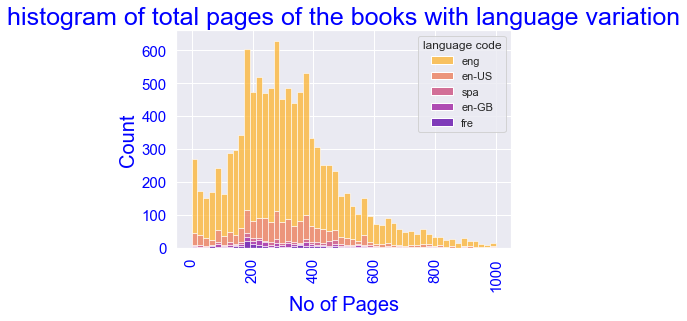

In [27]:
sns.histplot(data=lang_5[lang_5['no of pages']<=1000],x="no of pages",
             hue="language code",multiple="stack",palette="plasma_r")

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('No of Pages',size=20,color="blue")
plt.ylabel('Count',size=20,color="blue")
plt.title('histogram of total pages of the books with language variation',size=25,color="blue")
#plt.gca().legend(books["language code"].value_counts().index,loc="center left",bbox_to_anchor=(1,0.5))
plt.show()


In [60]:
#sns.histplot(data=books[books['no of pages']<=1000],x="no of pages",
#             hue="language code",multiple="stack",palette="plasma_r")

#plt.xticks(rotation=90,size=15,color="blue")
#plt.yticks(rotation=0,size=15,color="blue")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Count',size=20,color="blue")
#plt.title('scatter plot of language and rating',size=25,color="blue")
#plt.gca().legend(books["language code"].value_counts().index,loc="center left",bbox_to_anchor=(1,0.5))
#plt.show()


### (2.B.b) scatter plot of language and rating

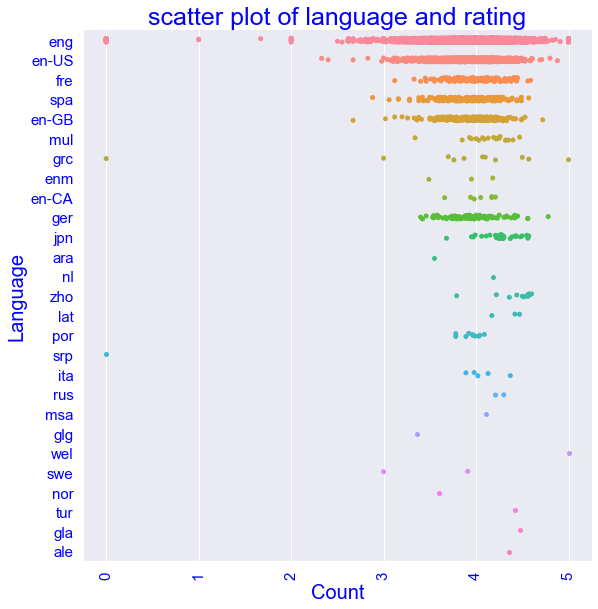

In [28]:
sns.set_theme()
#fig,axs=plt.subplots(figsize=(15,10))
sns.catplot(y="language code",x="average rating",data=books,height=8)
plt.title('scatter plot of language and rating',size=25,color="blue")

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.ylabel('Language',size=20,color="blue")
plt.xlabel('Count',size=20,color="blue")
plt.title('scatter plot of language and rating',size=25,color="blue")
plt.show()

### (2.B.c) bar plot of language and their average rating

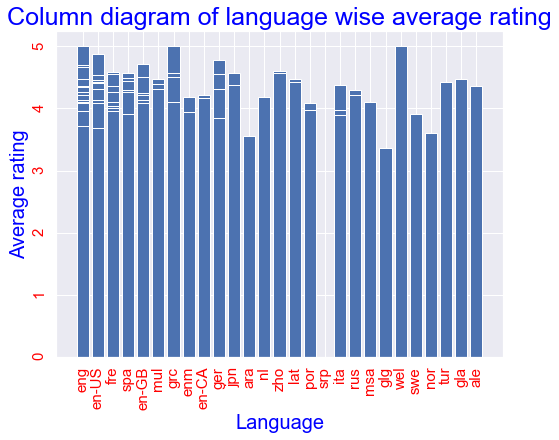

In [29]:
#sns.set_theme(style="ticks")
sns.set_theme()
plt.figure(figsize=(8,6))
plt.bar(books["language code"],books["average rating"])

plt.xticks(rotation=90,size=15,color="red")
plt.yticks(rotation=90,size=15,color="red")
plt.xlabel('Language',size=20,color="blue")
plt.ylabel('Average rating',size=20,color="blue")
plt.title('Column diagram of language wise average rating',size=25,color="blue")
plt.show()

In [68]:
##
#plt.figure(figsize=(15,10))
#ax = sns.relplot(x="average rating", y="language code", data = books, 
 #                color = 'red',sizes=(100, 200), height=7, marker='o')
#ax.set_axis_labels("Average Rating", "Languages")

#plt.xticks(rotation=90,size=15,color="red")
#plt.yticks(rotation=0,size=15,color="red")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Average rating',size=20,color="blue")
#plt.title('Column diagram of language and rating',size=25,color="blue")
#plt.show()

### (2.B.d) 10 top rated and reviewed books and their corresponding total  counts

C:\Users\Ramkrishna Mission\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramkrishna Mission\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


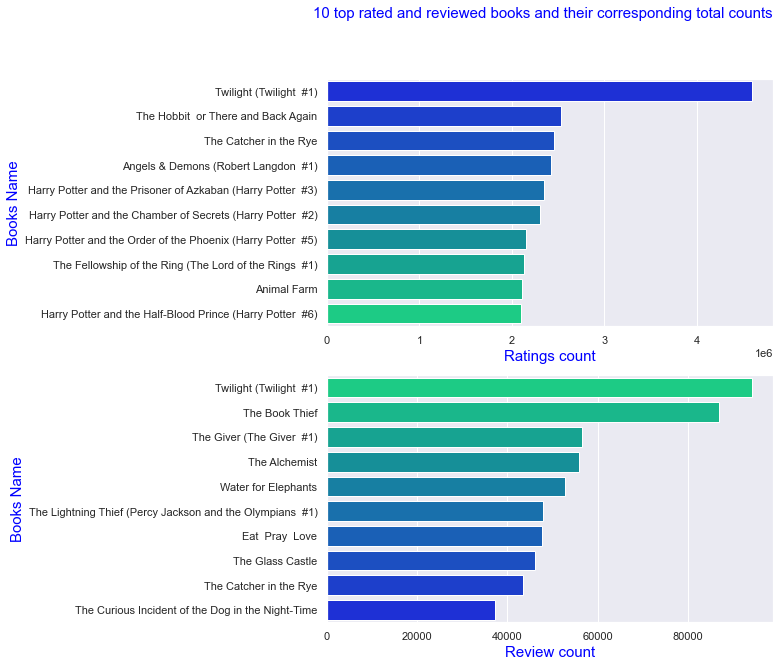

In [31]:

top_rated = books.groupby('title')['ratings count'].sum().sort_values(ascending=False).head(10)
top_reviewed = books.groupby('title')['text reviews count'].sum().sort_values(ascending=False).head(10)

fig,axs=plt.subplots(2,1,figsize=(8,10))

axs[0]=sns.barplot(top_rated, top_rated.index, palette='winter',ax=axs[0])
sns.barplot(top_reviewed, top_reviewed.index, palette='winter_r',ax=axs[1])

plt.suptitle('10 top rated and reviewed books and their corresponding total counts',size=15,color="blue")
axs[1].set_ylabel('Books Name',size=15,color="blue")
axs[1].set_xlabel('Review count',size=15,color="blue")
axs[0].set_ylabel('Books Name',size=15,color="blue")
axs[0].set_xlabel('Ratings count',size=15,color="blue")
plt.show()

In [95]:
##
#top_rated = books.groupby('title')['ratings count'].sum().sort_values(ascending=False).head(10)

#plt.figure(figsize=(15,10))
#sns.barplot(top_rated, top_rated.index, palette='winter')



In [96]:
##
#top_reviewed = books.groupby('title')['text reviews count'].sum().sort_values(ascending=False).head(10)

#plt.figure(figsize=(10,6))
#sns.barplot(top_reviewed, top_reviewed.index, palette='winter_r')

#plt.xticks(rotation=90,size=15,color="red")
#plt.yticks(rotation=0,size=15,color="red")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Average rating',size=20,color="blue")
#plt.title('Column diagram of language and rating',size=25,color="blue")
#plt.show()

### (2.B.e) bar plot of average rating of top 10 rated books 

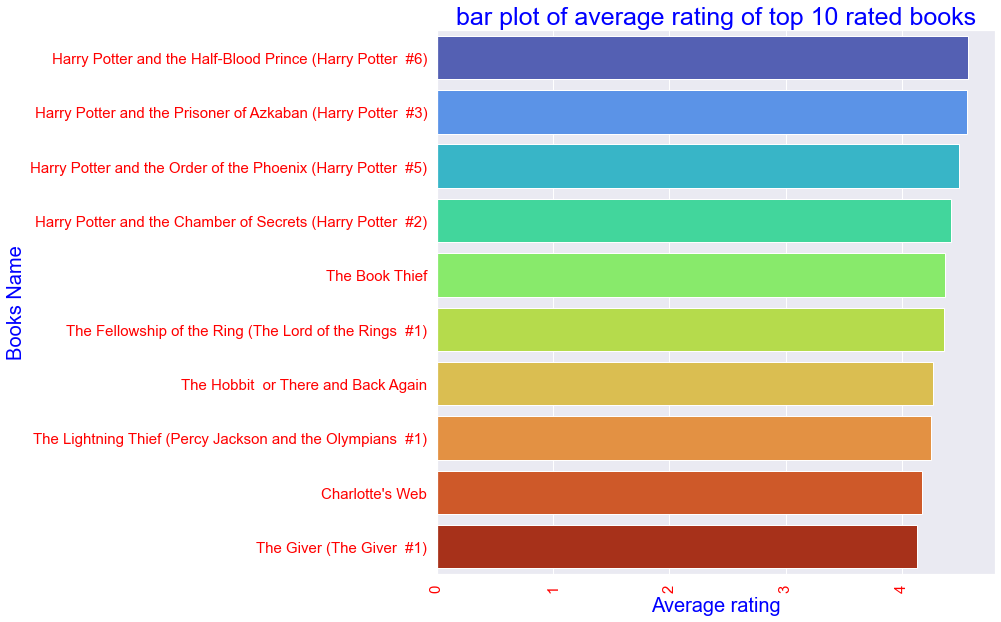

In [32]:
##
top_10 = books[books['ratings count'] > 1000000]
good_10=top_10.sort_values(by='average rating', ascending=False).head(10)

#plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 10))
#data = top_10.sort_values(by='average rating', ascending=False).head(10)
sns.barplot(x="average rating", y="title", data=good_10, palette='turbo')


plt.xticks(rotation=90,size=15,color="red")
plt.yticks(rotation=0,size=15,color="red")
plt.ylabel('Books Name',size=20,color="blue")
plt.xlabel('Average rating',size=20,color="blue")
plt.title('bar plot of average rating of top 10 rated books',size=25,color="blue")
plt.show()

In [105]:
##

#highly_rated_author =books[books['average rating']>4.4]
#highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
#plt.subplots(figsize=(15,10))
#ax = highly_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
#ax.set_xlabel("Total books ", fontsize=15)
#ax.set_ylabel("Authors", fontsize=15)
#ax.set_title("Top 10 highly rated authors",fontsize=20,color='black')



In [ ]:

'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 
'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r',


### (2.B.f) bar plot of Top 10 Publishers and their total no of books published

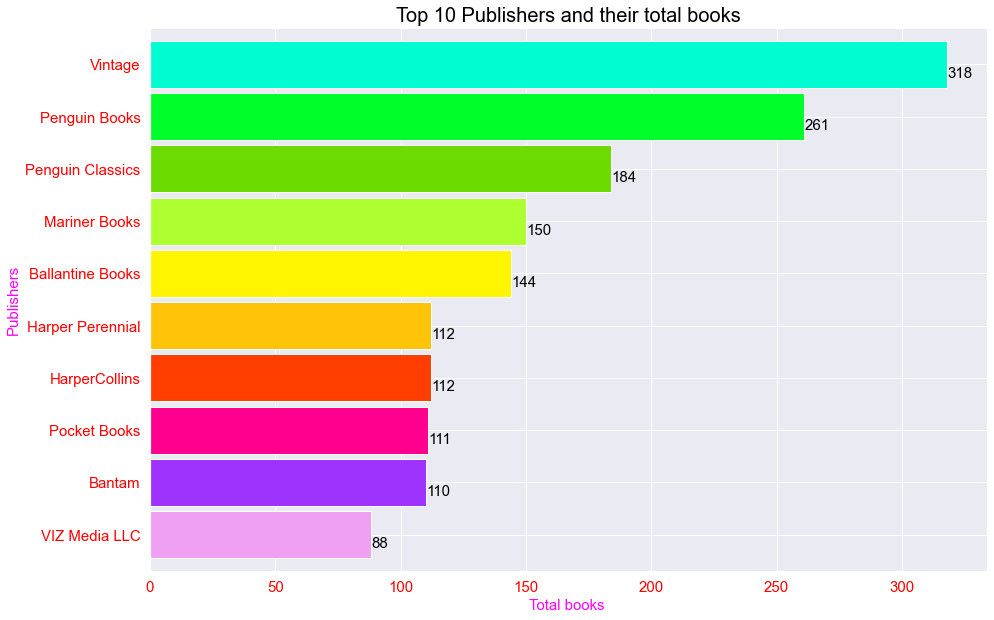

In [36]:
##
top_publishers = books.groupby('publisher')['title'].count().reset_index().sort_values('title',
                                                        ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(15,10))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_ncar_r',12))
ax.set_xlabel("Total books ", fontsize=15,color="magenta")
ax.set_ylabel("Publishers", fontsize=15,color="magenta")
ax.set_title("Top 10 Publishers and their total books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
    

plt.xticks(rotation=0,size=15,color="red")
plt.yticks(rotation=0,size=15,color="red")
plt.show()

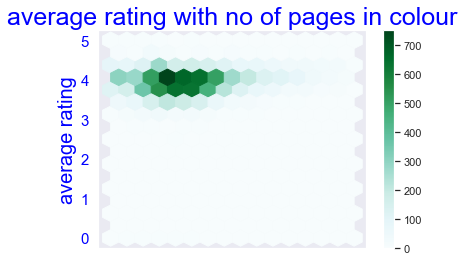

In [125]:
books[books['no of pages'] < 1000].plot.hexbin(x='no of pages',
                                            y='average rating', gridsize=15)

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('Language',size=20,color="blue")
plt.ylabel('average rating',size=20,color="blue")
plt.title('average rating with no of pages in colour',size=25,color="blue")
plt.show()


### (2.B.g) histogram plot of average rating with language variantion

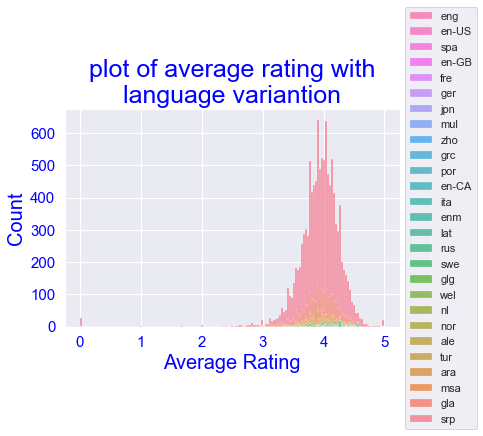

In [39]:
sns.histplot(data=books,x="average rating",
             hue="language code",multiple="stack")
current_handles,current_labels=plt.gca().get_legend_handles_labels()

plt.xticks(rotation=0,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('Average Rating',size=20,color="blue")
plt.ylabel('Count',size=20,color="blue")
plt.title('plot of average rating with\nlanguage variantion',size=25,color="blue")
plt.gca().legend(books["language code"].value_counts().index,loc="center left",
                 bbox_to_anchor=(1,0.5))
#plt.legend(col='lower center')
plt.show()

In [126]:
#sns.kdeplot(data=books,x="publication date",hue="rating",multiple="stack")
#plt.legend(books.rating,loc="upper left")
##ax.axis[0,2000,0,0.1]
#plt.gca().legend(["low","medium","high","very high"],loc="center left",bbox_to_anchor=(1,0.5))


#plt.xticks(rotation=90,size=15,color="red")
#plt.yticks(rotation=0,size=15,color="red")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Average rating',size=20,color="blue")
#plt.title('Column diagram of language and rating',size=25,color="blue")
##plt.gca().legend(loc="center left",bbox_to_anchor=(1,0.5))
#plt.show()

### (2.B.h) histogram plot of average rating showing year

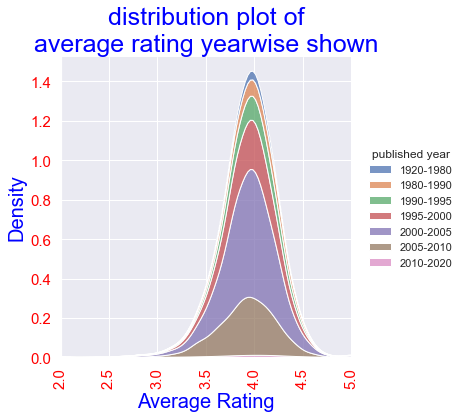

In [41]:
#fig,axs=plt.subplots()
sns.set_theme()
axs=sns.displot(books, x="average rating", hue="published year", kind="kde", multiple="stack")
#axs.axis([2,5,0,0.7])
plt.xlim([2, 5])


plt.xticks(rotation=90,size=15,color="red")
plt.yticks(rotation=0,size=15,color="red")
plt.xlabel('Average Rating',size=20,color="blue")
plt.ylabel('Density',size=20,color="blue")
plt.title('distribution plot of\naverage rating yearwise shown',size=25,color="blue")
#plt.gca().legend(loc="center left",bbox_to_anchor=(1,0.5))
plt.show()

In [127]:
#sns.histplot(data=books,x="average rating",
#             hue="published year",multiple="stack")

#plt.xticks(rotation=90,size=15,color="red")
#plt.yticks(rotation=0,size=15,color="red")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Average rating',size=20,color="blue")
#plt.title('Column diagram of language and rating',size=25,color="blue")
##plt.gca().legend(loc="center left",bbox_to_anchor=(1,0.5))
#plt.show()

### (2.B.i) histogram plot of average rating showing year

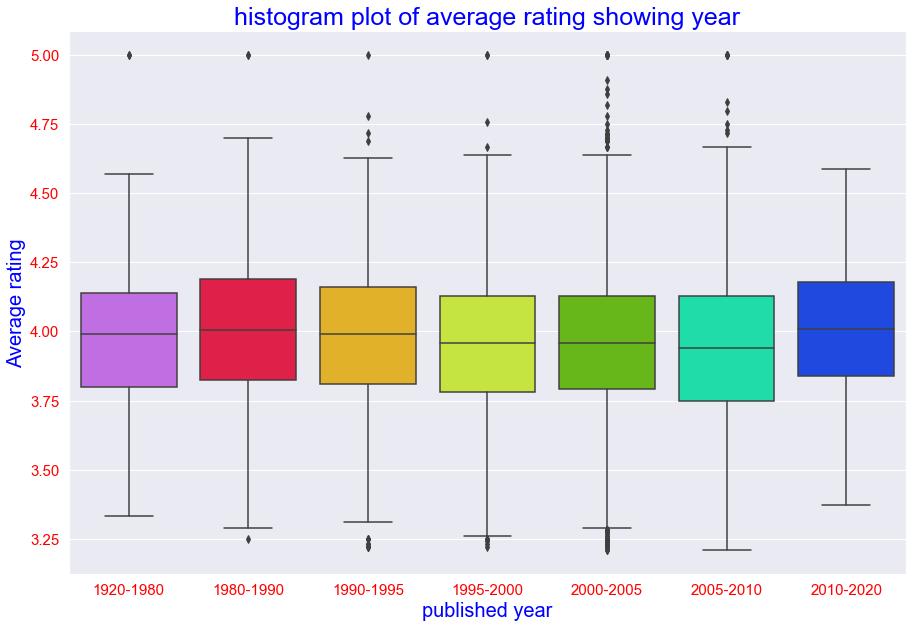

In [42]:
fig,ax= plt.subplots(figsize=(15,10))
sns.set_theme()
ax=sns.boxplot(data=books[books["average rating"]>3.2],x="published year",y="average rating",
               palette="gist_ncar_r")

plt.xticks(rotation=0,size=15,color="red")
plt.yticks(rotation=0,size=15,color="red")
plt.xlabel('published year',size=20,color="blue")
plt.ylabel('Average rating',size=20,color="blue")
plt.title('histogram plot of average rating showing year',size=25,color="blue")
#plt.gca().legend(loc="center left",bbox_to_anchor=(1,0.5))
plt.show()

### (2.B.j) histogram plot of average rating showing year

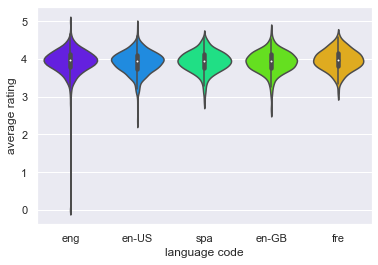

In [133]:
sns.violinplot(data=lang_5,x="language code",y="average rating",palette="gist_rainbow_r")
plt.show()

In [ ]:
### (2.B.k) histogram plot of average rating showing year

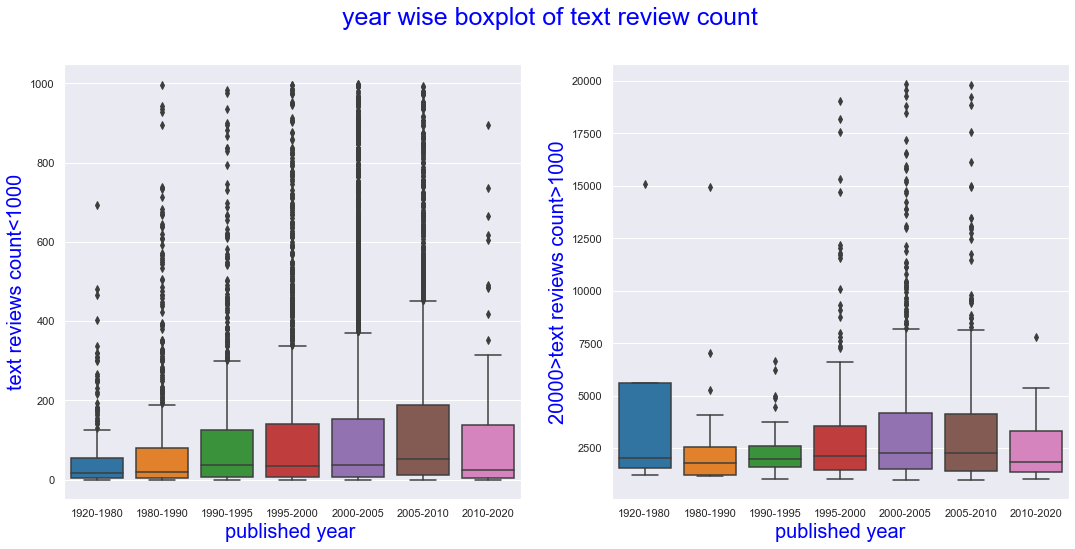

In [46]:
f, axs = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw=dict(width_ratios=[4, 4]))
sns.boxplot(data=books[books["text reviews count"]<1000],x="published year",y="text reviews count",
            ax=axs[0], palette="tab10")
sns.boxplot(data=books[(books["text reviews count"]>1000) & (books["text reviews count"]<20000)],
               x="published year",y="text reviews count",ax=axs[1], palette="tab10")

axs[1].set_ylabel('20000>text reviews count>1000',size=20,color="blue")
axs[1].set_xlabel('published year',size=20,color="blue")
axs[0].set_ylabel('text reviews count<1000',size=20,color="blue")
axs[0].set_xlabel('published year ',size=20,color="blue")
plt.suptitle('year wise boxplot of text review count',size=25,color="blue")

#axs[0].axis([0,6000, 0, 2.5* 10**5])
plt.show()

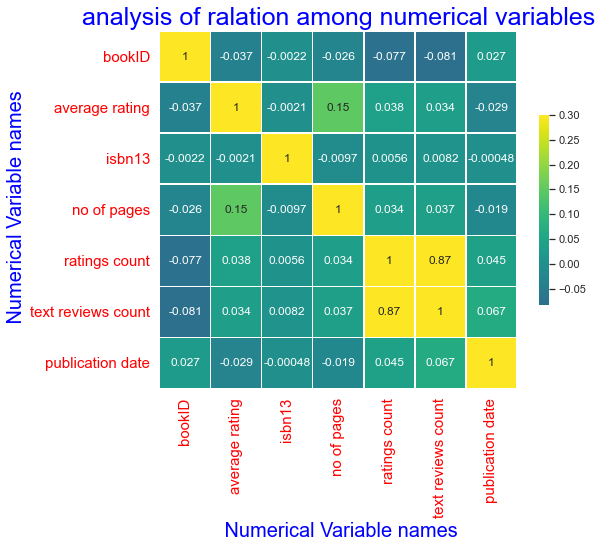

In [45]:

fig_dims = (8,7)

fig, ax = plt.subplots(figsize=fig_dims)
books_numeric = books.select_dtypes(include = ['int64','float64'])
corr = books_numeric.corr()
sns.heatmap(corr,vmax=.3, center=0,square=True, linewidths=.5, 
            cbar_kws={"shrink": .5},annot=True,cmap='viridis')

plt.xticks(rotation=90,size=15,color="red")
plt.yticks(rotation=0,size=15,color="red")
plt.xlabel(' Numerical Variable names',size=20,color="blue")
plt.ylabel(' Numerical Variable names',size=20,color="blue")
plt.title('analysis of ralation among numerical variables',size=25,color="blue")
#plt.gca().legend(loc="center left",bbox_to_anchor=(1,0.5))
plt.show()

#

# (3. . ) MULTI_VARIATE PLOTS  

## (3.1) ralation among average rating and rating count with rating level

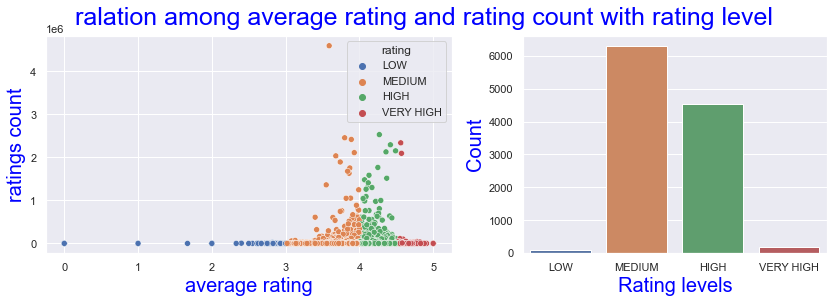

In [47]:
#mutliple axes level seaborn plots can be added to the the matplotlib figure axes
f, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=books,x="average rating",y="ratings count",hue="rating", ax=axs[0])
sns.countplot(data=books,x="rating",hue_order="rating",ax=axs[1])

#plt.xticks(rotation=90,size=15,color="blue")
#plt.yticks(rotation=0,size=15,color="blue")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Count',size=20,color="blue")
axs[1].set_ylabel('Count',size=20,color="blue")
axs[1].set_xlabel('Rating levels',size=20,color="blue")
axs[0].set_ylabel('ratings count',size=20,color="blue")
axs[0].set_xlabel('average rating',size=20,color="blue")

plt.suptitle('ralation among average rating and rating count with rating level',size=25,color="blue")
plt.show()

## (3.2) relation among average rating and ratinmg count with varied publishing year 

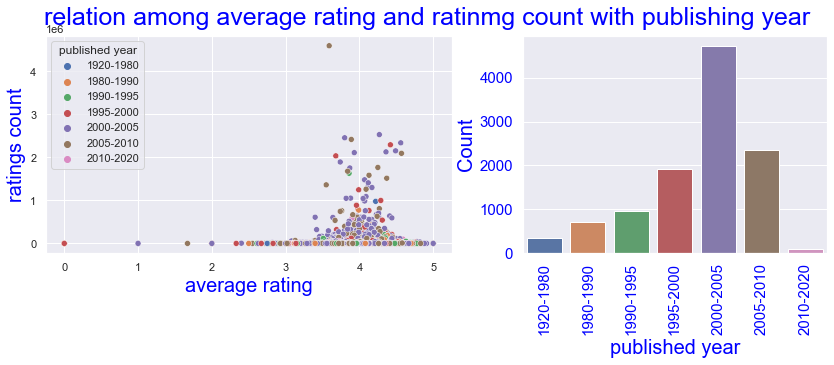

In [49]:
#mutliple axes level seaborn plots can be added to the the matplotlib figure axes
f, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=books,x="average rating",y="ratings count",hue="published year", ax=axs[0])


sns.countplot(data=books,x="published year",hue_order="published year",ax=axs[1])

axs[0].set_ylabel('ratings count',size=20,color="blue")
axs[0].set_xlabel('average rating',size=20,color="blue")
plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('published year',size=20,color="blue")
plt.ylabel('Count',size=20,color="blue")
plt.suptitle(' relation among average rating and ratinmg count with publishing year',size=25,color="blue")
plt.show()

In [159]:
#mutliple axes level seaborn plots can be added to the the matplotlib figure axes
#f, axs = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw=dict(width_ratios=[4, 3]))
#sns.scatterplot(data=books,x="average rating",y="ratings count",hue="published year", ax=axs[0])
#axs[0].set_ylabel('ratings count',size=20,color="blue")
#axs[0].set_xlabel('average rating',size=20,color="blue")
#plt.xticks(rotation=90,size=15,color="blue")
#plt.yticks(rotation=0,size=15,color="blue")


#sns.countplot(data=books,y="published year",hue_order="published year",ax=axs[1],orient='h')

#axs[1].set_ylabel('Count',size=20,color="blue")
#axs[1].set_xlabel('Language',size=20,color="blue")
#plt.xticks(rotation=90)
#plt.yticks(rotation=0,size=15,color="blue")
#plt.suptitle('scatter plot of language and rating',size=25,color="blue")
#plt.show()

## (3.3) ralation between reviews count and rating count with rating level

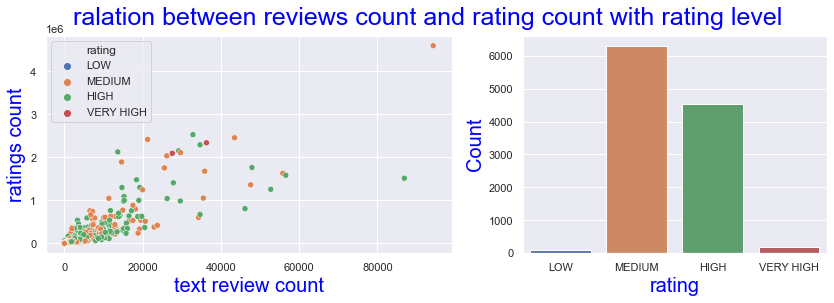

In [50]:
#mutliple axes level seaborn plots can be added to the the matplotlib figure axes
f, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=books,x="text reviews count",y="ratings count",hue="rating", ax=axs[0])
sns.countplot(data=books,x="rating",hue_order="rating",ax=axs[1])

axs[1].set_ylabel('Count',size=20,color="blue")
axs[1].set_xlabel('rating',size=20,color="blue")
axs[0].set_ylabel('ratings count',size=20,color="blue")
axs[0].set_xlabel('text review count',size=20,color="blue")
plt.suptitle(' ralation between reviews count and rating count with rating level',size=25,color="blue")

plt.show()

## (3.4) ralation between publication year and rating count with rating level

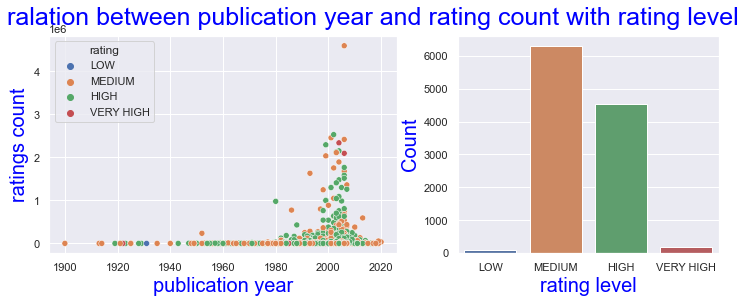

In [51]:
#mutliple axes level seaborn plots can be added to the the matplotlib figure axes
f, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=books,x="publication date",y="ratings count",hue="rating", ax=axs[0])
sns.countplot(data=books,x="rating",hue_order="rating",ax=axs[1])

axs[1].set_ylabel('Count',size=20,color="blue")
axs[1].set_xlabel('rating level',size=20,color="blue")
axs[0].set_ylabel('ratings count',size=20,color="blue")
axs[0].set_xlabel('publication year',size=20,color="blue")
plt.suptitle('ralation between publication year and rating count with rating level',size=25,color="blue")
plt.show()

## (3.5) ralation between publication year and rating count with rating level

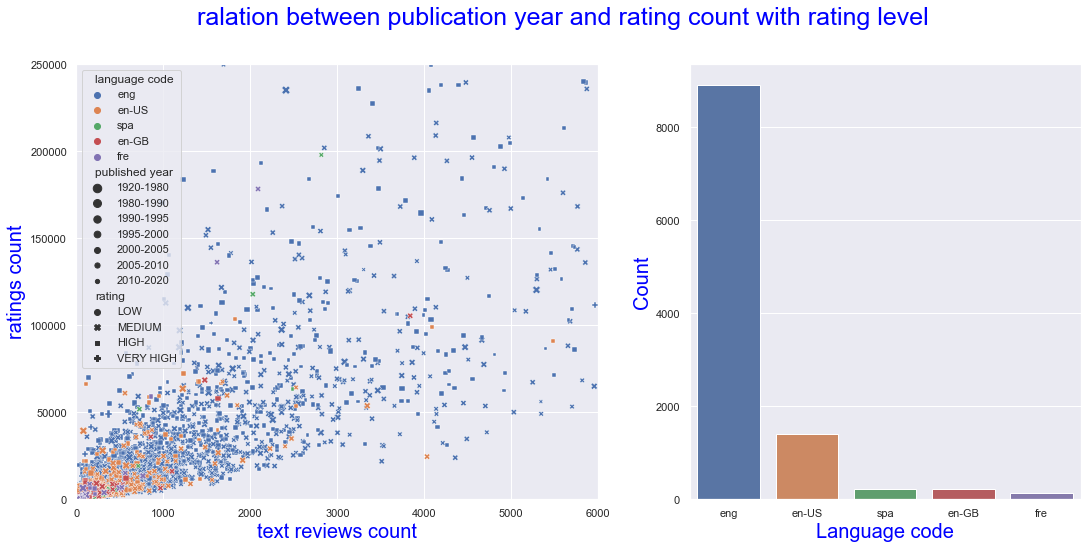

In [52]:
#mutliple axes level seaborn plots can be added to the the matplotlib figure axes
f, axs = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=lang_5,x="text reviews count",y="ratings count",hue="language code", 
                ax=axs[0],style="rating",size="published year")
sns.countplot(data=lang_5,x="language code",hue_order="language code",ax=axs[1])

axs[1].set_ylabel('Count',size=20,color="blue")
axs[1].set_xlabel('Language code',size=20,color="blue")
axs[0].set_ylabel('ratings count',size=20,color="blue")
axs[0].set_xlabel('text reviews count',size=20,color="blue")
plt.suptitle('ralation between publication year and rating count with rating level',size=25,color="blue")

axs[0].axis([0,6000, 0, 2.5* 10**5])
#plt.gca().legend(["low","medium","high","very high"],loc="center left",bbox_to_anchor=(1,0.5))
#plt.legend(col=3)
plt.show()

In [157]:
#fig,axs=plt.subplots(1,4)
#axs=sns.displot(data=lang_5,x="language code", hue="published year",col='rating')

#axs[1].set_ylabel('Count',size=20,color="blue")
#axs[1].set_xlabel('Language',size=20,color="blue")
#axs[0].set_ylabel('ratings count',size=20,color="blue")
#axs[0].set_xlabel('average rating',size=20,color="blue")
#axs[0].axis([0,6000, 0, 4* 10**5])
#plt.gca().legend(["low","medium","high","very high"],loc="center left",bbox_to_anchor=(1,0.5))
#plt.legend(col=3)
#plt.show()

## (3.6) ralation between publication year and rating count with rating level

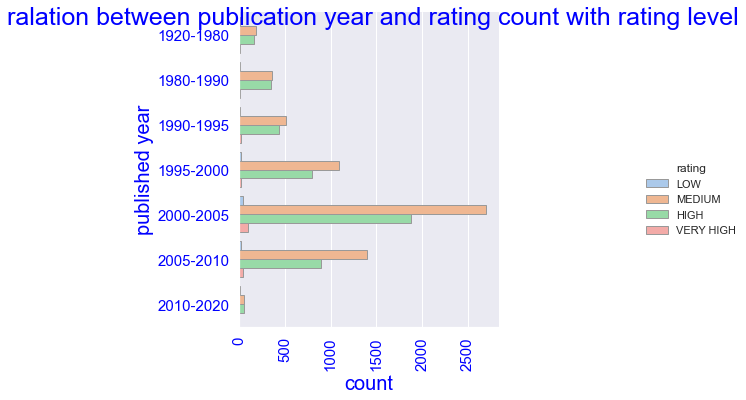

In [53]:
sns.set_theme()
sns.catplot(y="published year", hue="rating", kind="count",
            palette="pastel", edgecolor=".6",
            data=books)

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('count',size=20,color="blue")
plt.ylabel('published year',size=20,color="blue")
plt.suptitle('ralation between publication year and rating count with rating level',size=25,color="blue")
plt.show()

In [162]:
#g = sns.catplot(x="average rating", y="rating", row="published year",
#                kind="box", orient="h", height=1.5, aspect=8,
#                data=books)
#g.set(xscale="log")
#plt.gca().legend(loc="center left",bbox_to_anchor=(1,.5))
##plt.yticks(fontsize=20,color='magenta',rotation=90)

## (3.7) ralation between no of pages and text reviews count with rating level

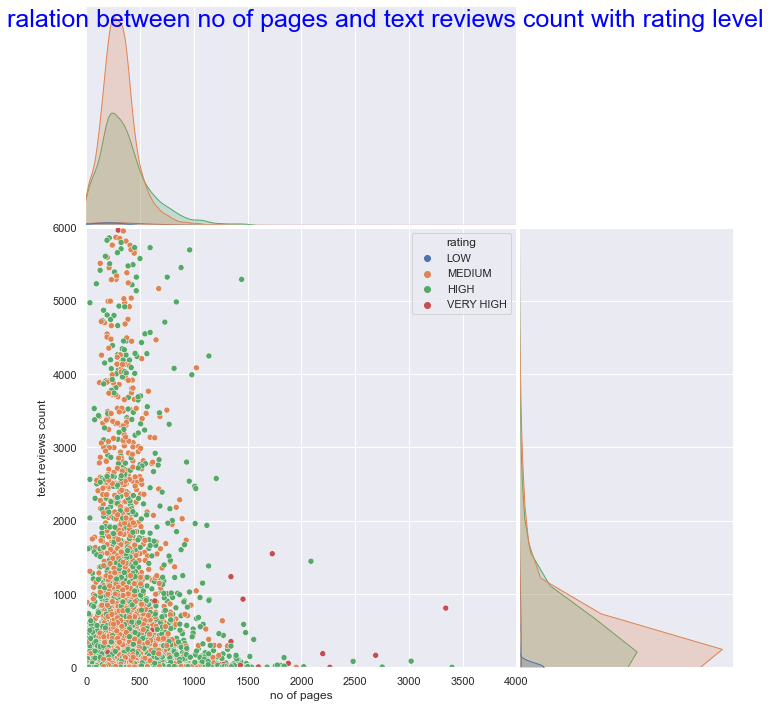

In [54]:
#fig,axs=plt.subplots()
axs=sns.jointplot(data=books, x="no of pages", y="text reviews count", hue="rating" ,
    height=10,ratio=2,space=0.01, xlim=(0,4000),ylim=(0,6000),)
#axs.axis([0,300000,0,6000])
plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('no of pages',size=20,color="blue")
plt.ylabel('text reviews count',size=20,color="blue")
plt.suptitle('ralation between no of pages and text reviews count with rating level',size=25,color="blue")
plt.show()


In [163]:
#sns.violinplot(data=books,x="rating",y="average rating",hue="published year",height=10)

In [164]:
#sns.violinplot(data=lang_2,x="rating",y="average rating",hue="language code", cut=0,
#    scale='area',
#    scale_hue=True,
#    gridsize=100,
 #   width=0.8,
#    inner='box',
  #  split=True,
 #   dodge=True,
   # orient=None,
    #linewidth=None,
    #color="red",
    #palette="viridis",
    #saturation=80)

## (3.8) ralation between rating level and text reviews count with language

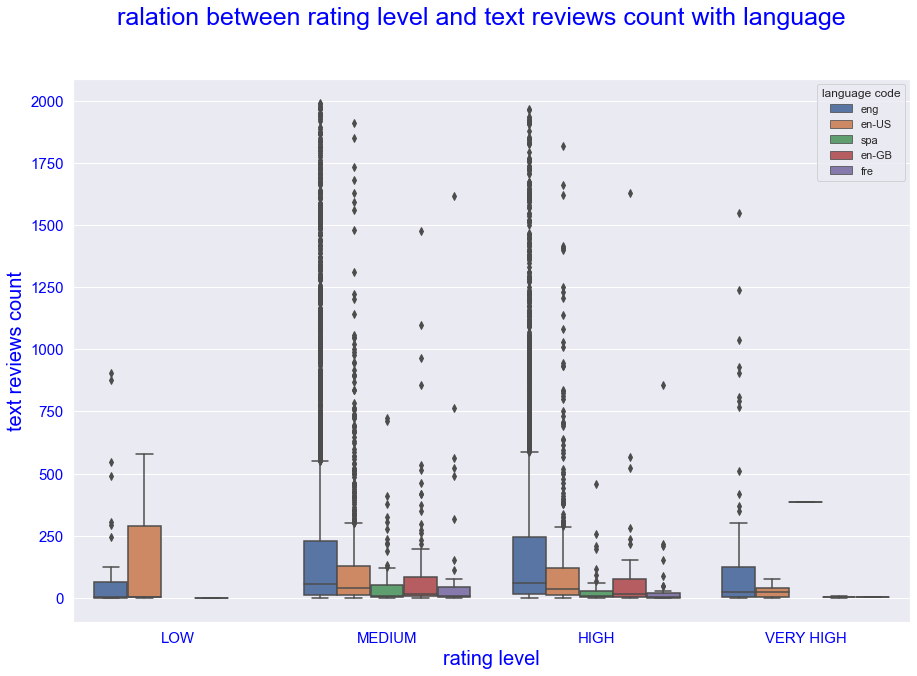

In [56]:
fig,ax= plt.subplots(figsize=(15,10))
ax=sns.boxplot(data=lang_5[(lang_5["text reviews count"]<2000) & (lang_5["text reviews count"]!=0)],
               x="rating",
               y="text reviews count",hue="language code")

plt.xticks(rotation=0,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('rating level',size=20,color="blue")
plt.ylabel('text reviews count',size=20,color="blue")
plt.suptitle(' ralation between rating level and text reviews count with language',size=25,color="blue")
plt.show()

## (3.9) ralation between no of pages and text reviews count with rating level

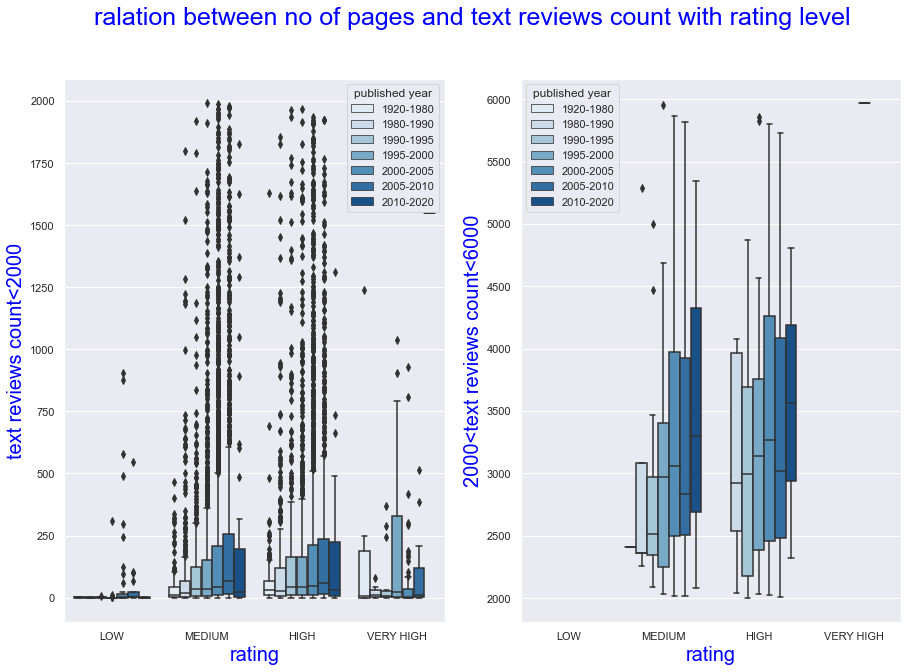

In [58]:
fig,axs= plt.subplots(1,2,figsize=(15,10))
sns.boxplot(data=books[books["text reviews count"]<2000],
               x="rating",y="text reviews count",hue="published year",palette="Blues",ax=axs[0])
sns.boxplot(data=books[(books["text reviews count"]>2000) & (books["text reviews count"]<6000)],
               x="rating",y="text reviews count",hue="published year",palette="Blues",ax=axs[1])
axs[1].set_ylabel('2000<text reviews count<6000',size=20,color="blue")
axs[1].set_xlabel('rating',size=20,color="blue")
axs[0].set_ylabel('text reviews count<2000',size=20,color="blue")
axs[0].set_xlabel('rating',size=20,color="blue")
plt.suptitle(' ralation between no of pages and text reviews count with rating level',size=25,color="blue")

#axs[0].axis([0,6000, 0, 2.5* 10**5])
plt.show()

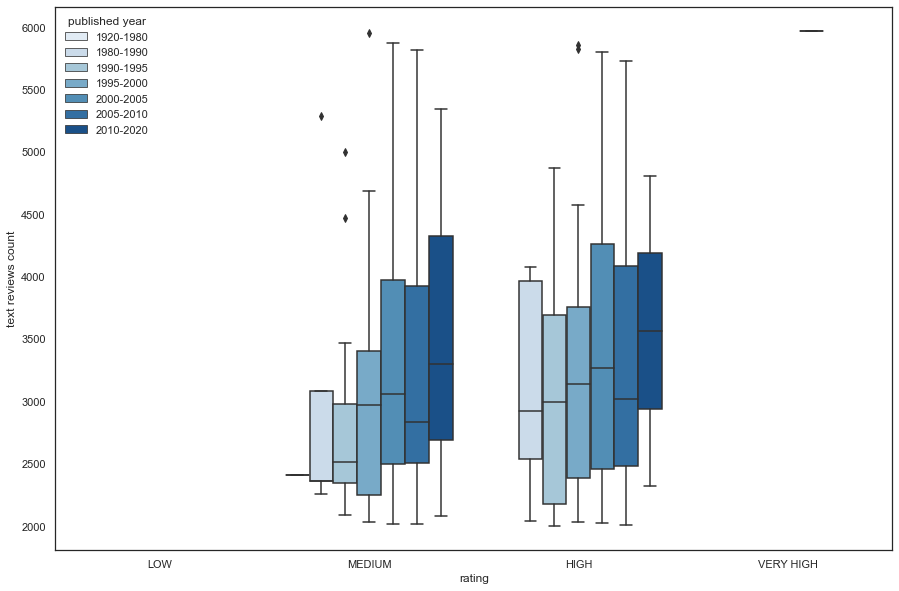

In [204]:
fig,ax= plt.subplots(figsize=(15,10))

ax=sns.boxplot(data=books[(books["text reviews count"]>2000) & (books["text reviews count"]<6000)],
               x="rating",y="text reviews count",hue="published year",palette="Blues")

## (3.10) ralation between no of pages and rating level with year f publiction

In [68]:
sns.set_theme(style="white")
fig,ax= plt.subplots(figsize=(15,10))
sns.color_palette("viridis", as_cmap=True)
#sns.set_theme("white")
ax=sns.boxplot(data=books[books["no of pages"]<2000],x="rating",y="no of pages",
               hue="published year",palette="viridis")

plt.xticks(rotation=0,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('rating',size=20,color="blue")
plt.ylabel('no of pages',size=20,color="blue"
#plt.title('ralation between no of pages and rating level with year of publiction',size=25)#,
#          color= "green")

#axs[0].axis([0,6000, 0, 2.5* 10**5])
plt.show()

SyntaxError: invalid syntax (<ipython-input-68-2eb7a1acffed>, line 16)

## (3.11) ralation between no of pages and language code with year f publiction

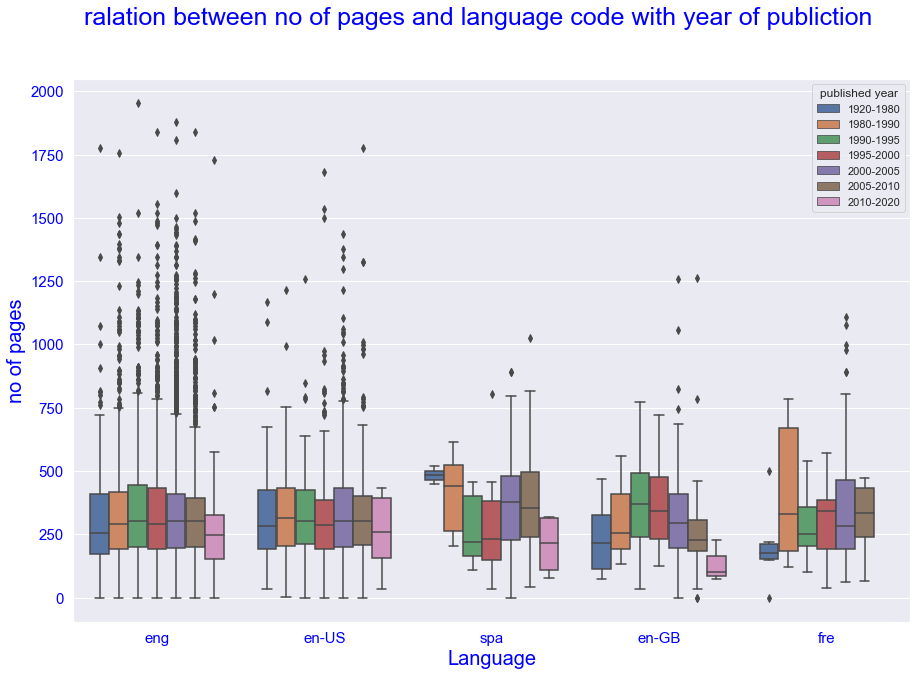

In [69]:
fig,ax= plt.subplots(figsize=(15,10))

ax=sns.boxplot(data=lang_5[lang_5["no of pages"]<2000],x="language code",
                  y="no of pages",hue="published year")

plt.xticks(rotation=0,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('Language',size=20,color="blue")
plt.ylabel('no of pages',size=20,color="blue")
plt.suptitle('ralation between no of pages and language code with year of publiction',size=25,color="blue")
plt.show()

## (3.12) ralation between no of pages and language code with rating level

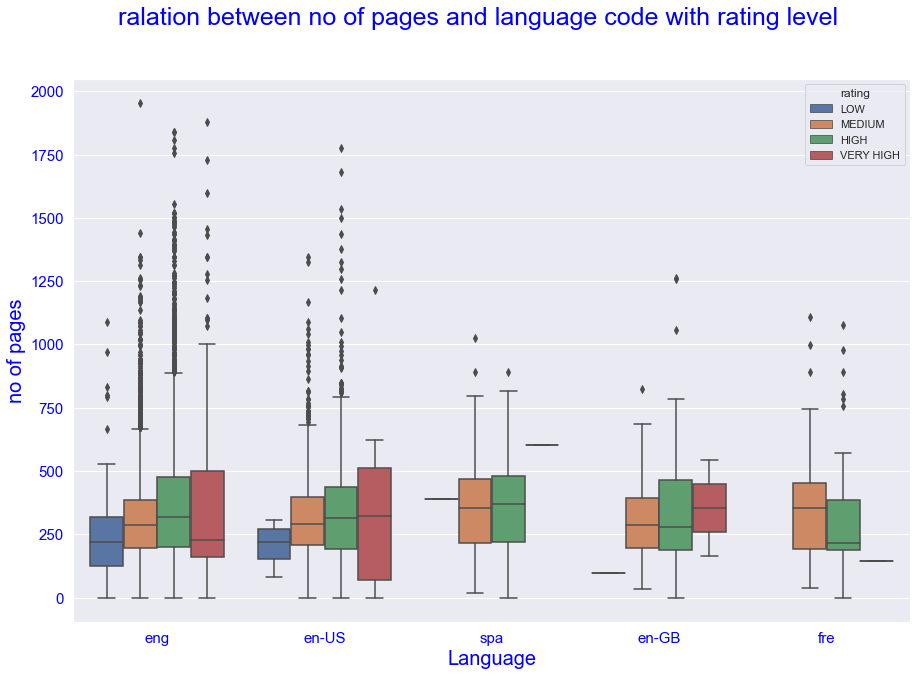

In [70]:
fig,ax= plt.subplots(figsize=(15,10))

ax=sns.boxplot(data=lang_5[lang_5["no of pages"]<2000],x="language code",y="no of pages",
               hue="rating")

plt.xticks(rotation=0,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('Language',size=20,color="blue")
plt.ylabel('no of pages',size=20,color="blue")
plt.suptitle('ralation between no of pages and language code with rating level',size=25,color="blue")
plt.show()

## (3.13) ralation between ratings count and language code with rating level

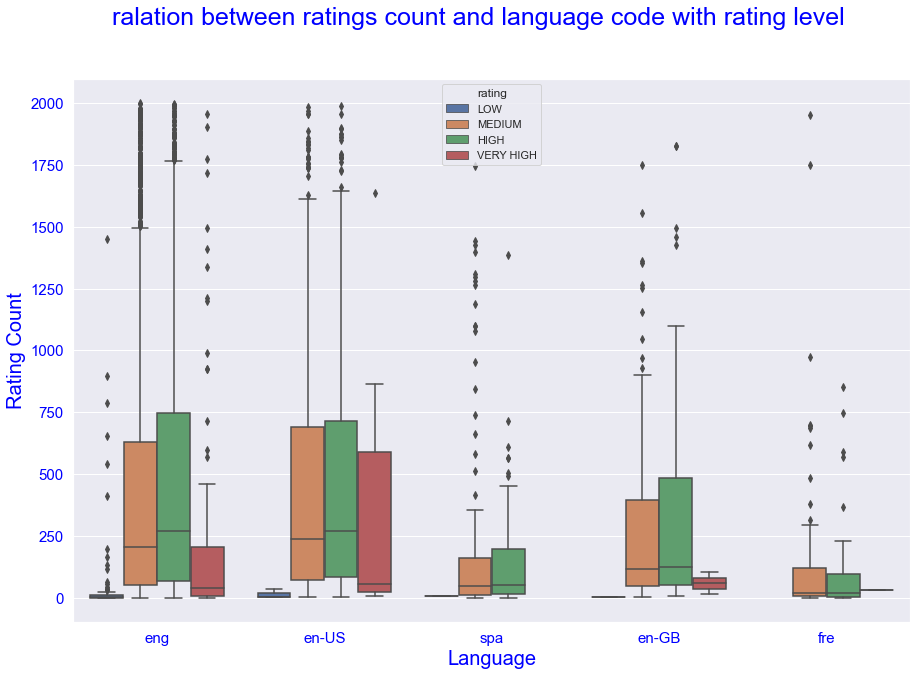

In [71]:
fig,ax= plt.subplots(figsize=(15,10))

ax=sns.boxplot(data=lang_5[lang_5["ratings count"]<2000],x="language code",
               y="ratings count",hue="rating")

plt.xticks(rotation=0,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('Language',size=20,color="blue")
plt.ylabel('Rating Count',size=20,color="blue")
plt.suptitle('ralation between ratings count and language code with rating level',size=25,color="blue")
plt.show()

# some more complicated analysis

## (3.14) ralation between ratings count and published year with rating level

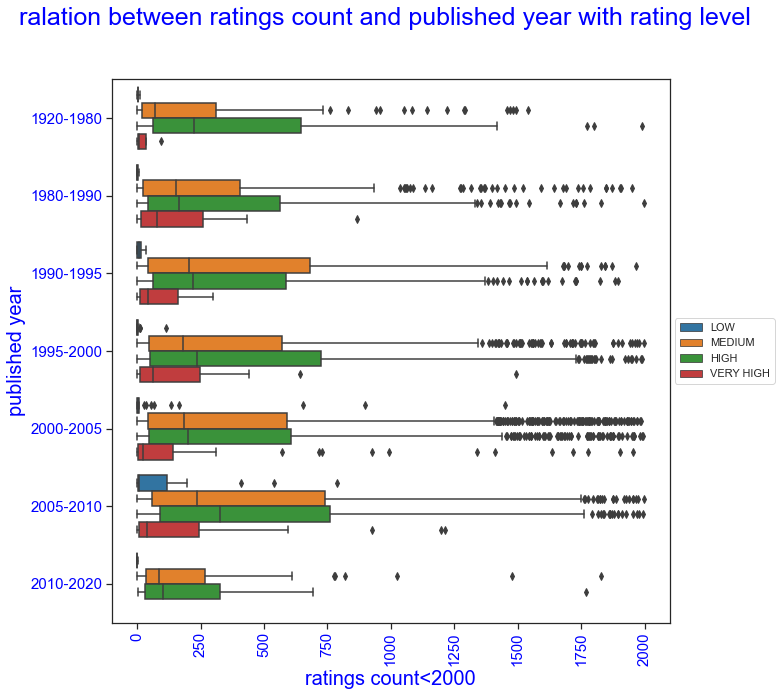

In [73]:
#fig,bar1=plt.subplots()
#theme(console-foreground = #E0E2E4)
#sns.set_style(console-foreground = #E0E2E4)
sns.set_theme()
sns.set_theme(style="ticks", color_codes=True)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=books[books["ratings count"]<2000],y="published year",x="ratings count",
            hue="rating",
            orient="h", palette="tab10",dodge=True)
sns.color_palette("viridis", as_cmap=True)
#bar1.set_xticklabel(rotation=90)
plt.xticks(rotation=45)
plt.gca().legend(loc="center left",bbox_to_anchor=(1,.5))

plt.xticks(rotation=90,size=15,color="blue")
plt.yticks(rotation=0,size=15,color="blue")
plt.xlabel('ratings count<2000',size=20,color="blue")
plt.ylabel('published year',size=20,color="blue")
plt.suptitle(' ralation between ratings count and published year with rating level',size=25,color="blue")
plt.show()

## (3.15) ralation between ratings count and rating level with published year  

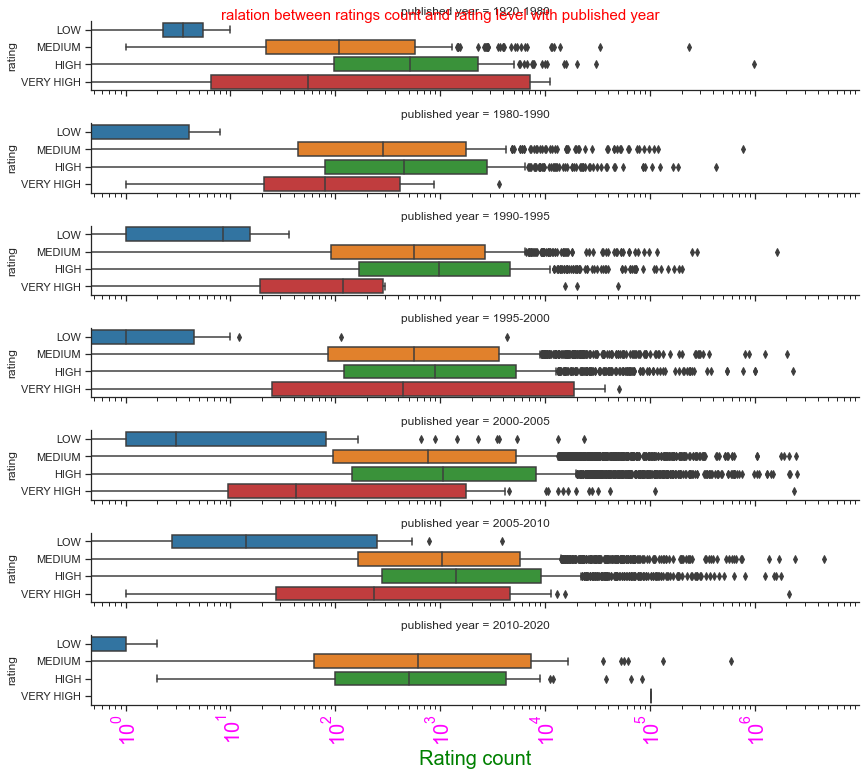

In [74]:
g = sns.catplot(x="ratings count", y="rating", row="published year",
                kind="box", orient="h", height=1.5, aspect=8,palette="tab10",
                data=books)
g.set(xscale="log")
#plt.gca().legend(loc="center left",bbox_to_anchor=(1,.5))
plt.xticks(fontsize=20,color='magenta',rotation=90)
plt.xlabel(fontsize=20,xlabel="Rating count", color="green")
#plt.xticks(rotation=90,size=15,color="blue")
#plt.yticks(rotation=0,size=15,color="blue")
#plt.xlabel('Language',size=20,color="blue")
#plt.ylabel('Count',size=20,color="blue")
plt.suptitle('ralation between ratings count and rating level with published year',size=15,color="red")
plt.show()

## (3.16) ralation between text reviews count and rating level with published year 

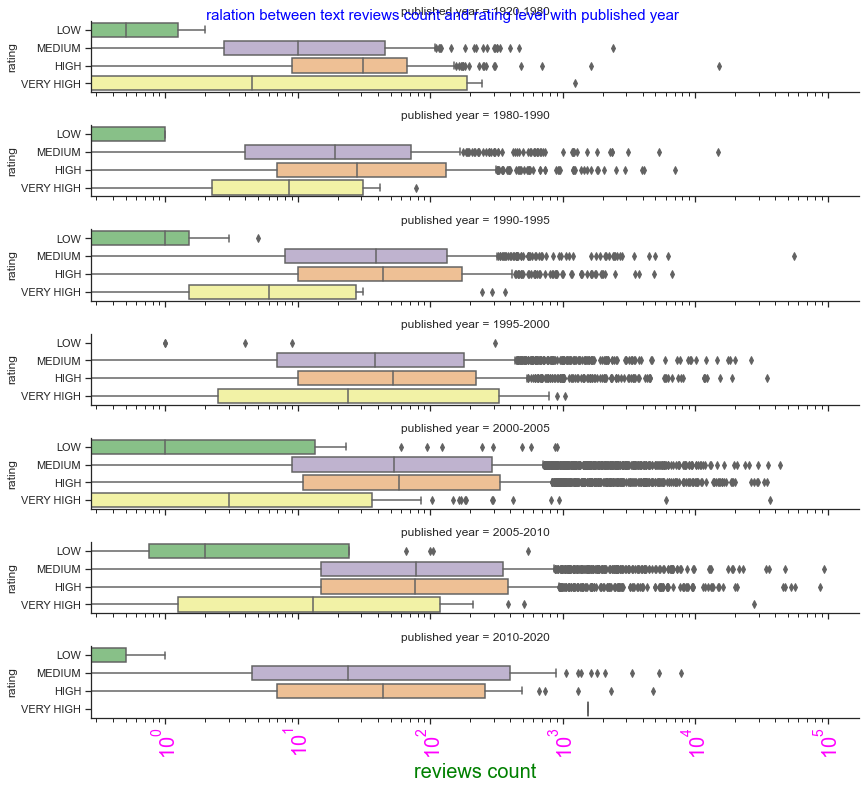

In [75]:
g = sns.catplot(x="text reviews count", y="rating", row="published year",
                kind="box", orient="h", height=1.5, aspect=8,palette="Accent",
                data=books)
g.set(xscale="log")
#plt.gca().legend(loc="center left",bbox_to_anchor=(1,.5))
plt.xticks(fontsize=20,color='magenta',rotation=90)
plt.xlabel(fontsize=20,xlabel="reviews count", color="green")
plt.suptitle(' ralation between text reviews count and rating level with published year',size=15,color="blue")
plt.show()

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired',
'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn',
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 
'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 
'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 
'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 
#'viridis_r', 'vlag', 'vlag_r', 
#'winter', 'winter_r'